# Iris Dataset Classification with apenet's Neural Network

This notebook demonstrates how to build, train, and evaluate a neural network model using the apenet library, using the Iris Dataset as an example.

## Import Libraries

In [ ]:
import numpy as np
## Data processing
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import our library
from apenet.nn.models.mlp import MLP
from apenet.utils.data import train_test_split
from apenet.nn.loss.losses import CrossEntropyLoss
from apenet.nn.optimizers.optimizers import SGD

from apenet.eye.visuals import plot_history

## Setup Random Generator

In [109]:
seed = 42
rng = np.random.default_rng(seed=seed)

# Data Overview

## Load and Preprocess Data


In [110]:
# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target

## Data Visualization

In [ ]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

## Data Preprocessing


In [112]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, rng=rng)

# Model Overview

## Create Model


In [113]:
model = MLP(
    input_size=X_train.shape[1],
    hidden_sizes=[16,8],
    output_size=3,
    hidden_activation='tanh',
    output_activation=None,
    initializer='Xavier',
    rng=rng
)


## Define Loss Function and Optimizer


In [114]:
loss_fn = CrossEntropyLoss()
optimizer = SGD(model.get_parameters(), learning_rate=0.01)

## Train Model


In [ ]:
# Train model
history = model.fit(
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=50,
    batch_size=16,
    verbose=10,
    X_train=X_train, y_train=y_train, X_val=X_test, y_val=y_test
)


## Evaluate Model


In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, loss_fn=loss_fn)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

## Plot Training History


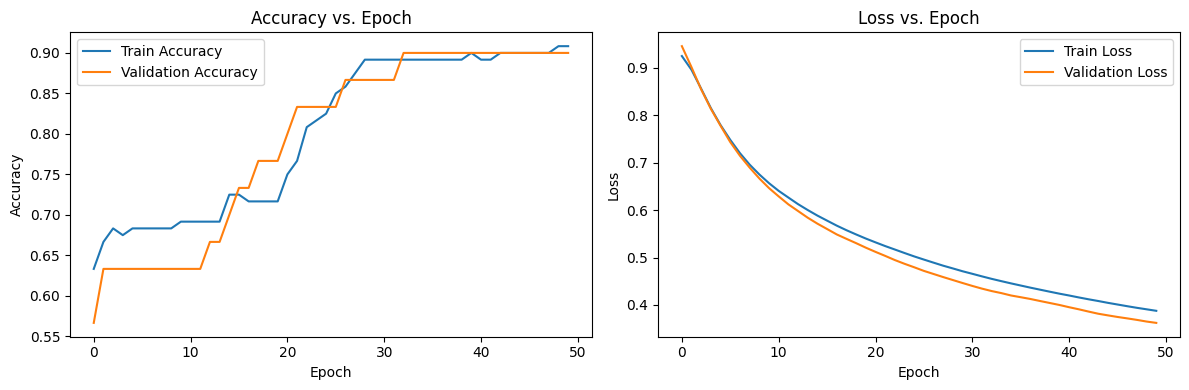

In [117]:
plot_history(history)